In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

### PROJECT OVERVIEW

Cardiovascular disease is common in the general population, affecting the majority of adults. It includes:

Coronary heart disease (CHD): Myocardial infarction (MI), angina pectoris, heart failure (HF), and coronary death.
Cerebrovascular disease, stroke and transient ischemic attack (TIA).
Peripheral arterial disease, intermittent claudication and significant limb ischemia.
Aortic disease: Aortic atherosclerosis, thoracic aortic aneurysm, and abdominal aortic aneurysm.
An individual's risk for future cardiovascular events is modifiable, by lifestyle changes and preventive medical treatment. Lifestyle changes can include stopping smoking, healthy diet, regular exercise, etc. Preventive medical treatment can include a statin, mini dose aspirin, treatment for hypertension, etc. It is important to be able to predict the risk of an individual patient, in order to decide when to initiate lifestyle modification and preventive medical treatment.

Multiple risk models for the prediction of cardiovascular risk of individual patients have been developed. One such key risk model is the Framingham Risk Score.

The Framingham Risk Score is based on findings from the Framingham Heart Study.

This project focuses on developing a robust machine learning-based MODEL for Predicting the 10 year risk of developing CHD.

To know more on Framingam Heart Study and Framingam Risk Score, click on the below links:-

"Framingham Risk Score"  - <https://en.wikipedia.org/wiki/Framingham_Risk_Score>                            
"Framingham Heart Study" - <https://en.wikipedia.org/wiki/Framingham_Heart_Study>

### About Dataset

The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease.

male:             
Description: Gender of the participant.           
Values: 1 for male, 0 for female.           

age:               
Description: Age of the participant in years.                 
Values: Numerical value representing the participant's age.                    

education:                  
Description: Education level of the participant.                 
Values:
1 = Some high school
2 = High school graduate
3 = Some college
4 = College graduate                

currentSmoker:                 
Description: Whether the participant currently smokes cigarettes.                
Values: 1 for yes, 0 for no.               

cigsPerDay:                 
Description: The average number of cigarettes smoked per day by the participant.             
Values: Numerical value representing the number of cigarettes.                    

BPMeds:                 
Description: Whether the participant is currently on blood pressure medication.                        
Values: 1 for yes, 0 for no.                   

prevalentStroke:                    
Description: Whether the participant has a history of stroke.                         
Values: 1 for yes, 0 for no.                      

prevalentHyp:                     
Description: Whether the participant has a history of hypertension (high blood pressure).                       
Values: 1 for yes, 0 for no.                        

diabetes:                       
Description: Whether the participant has diabetes.                          
Values: 1 for yes, 0 for no.                      

totChol:                      
Description: Total cholesterol level of the participant.                 
Values: Numerical value representing cholesterol level in mg/dL.                    

sysBP:                      
Description: Systolic blood pressure of the participant.                     
Values: Numerical value representing systolic blood pressure in mmHg.                      

diaBP:                         
Description: Diastolic blood pressure of the participant.                         
Values: Numerical value representing diastolic blood pressure in mmHg.                            

BMI:                          
Description: Body Mass Index of the participant.                              
Values: Numerical value calculated as weight (kg) / height (m)^2.                                      

heartRate:                              
Description: Heart rate of the participant.                        
Values: Numerical value representing beats per minute.                       

glucose:                            
Description: Blood glucose level of the participant.                                    
Values: Numerical value representing glucose level in mg/dL.                                 

TenYearCHD:                             
Description: Whether the participant developed coronary heart disease (CHD) within ten years.                                       
Values: 1 for yes, 0 for no.             

In [112]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [23]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Exploratory Data Visualization
Before creating the model, I will perform some exploratory data visualization, to get some insights on the data. As mentioned above, there are many risk factors such as smoking and high cholesterol levels that were found by the Framingham Heart Study to increase 10 year risk of CHD. I will take a look at some of these risk factors, and see if I can find these relationships in this dataset.

In [32]:
#level of education of the participants

<Axes: xlabel='education', ylabel='count'>

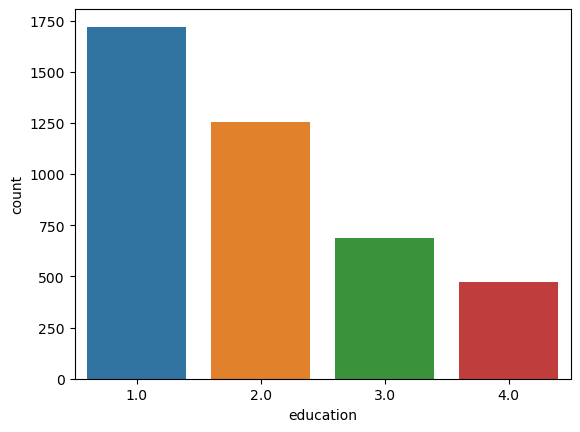

In [28]:
sns.countplot(x='education',data=df)

Very few participants have owns a degree and a fewer number of them have a diploma or went to college. Most participants seem to have some form of high school education.

In [35]:
# The Effect of smoking on increase the risk of CHD

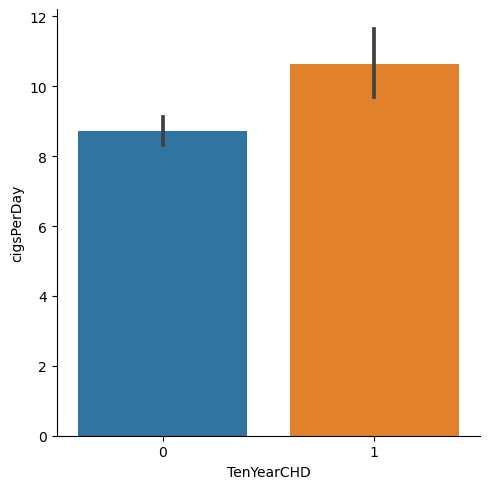

In [39]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=df)

A person who smoke more cigarattes per day is more likely to have a ten year CHD risk than those who do not.

In [42]:
# Relationship between age and the ten year risk of CHD, sorting by the category smoker.

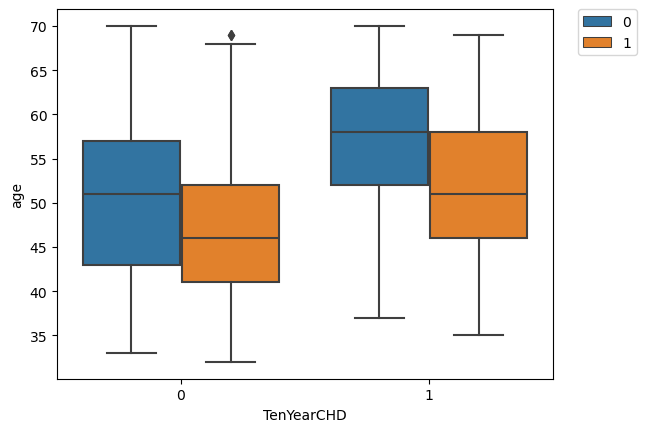

In [44]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From here, it can be seen that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

In [47]:
# The relationship between age, prevalent stroke, and the ten year risk of developing CHD.

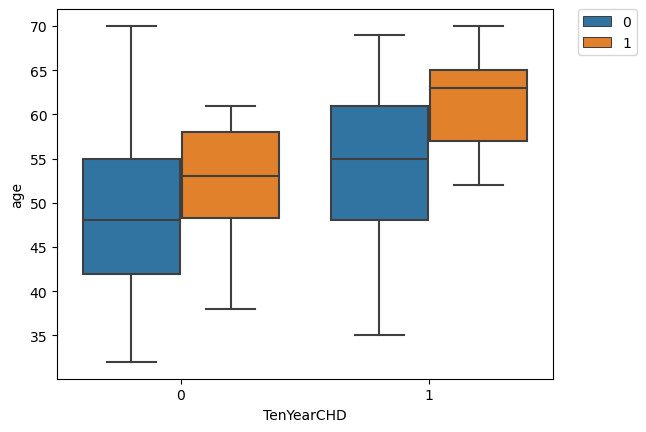

In [51]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though strokes are more prevalent in participants of an older age group.

In [54]:
#  The relation between age, diabetes, and ten year risk of developing CHD.

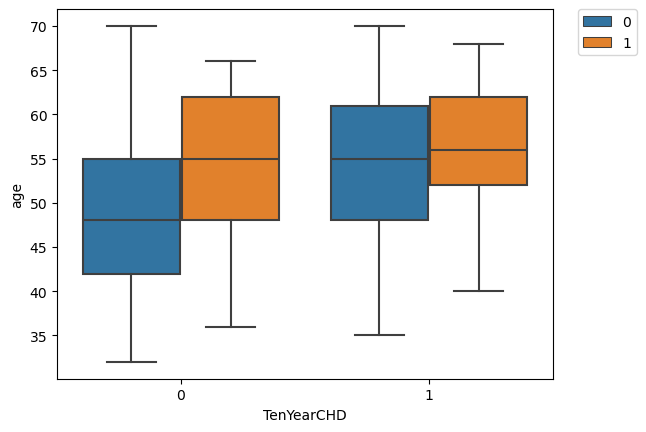

In [71]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, it looks as though an older participant is more likely to have diabetes than a younger one.

In [61]:
# The relation between total cholesterol levels and ten year risk of developing CHD.

(0.0, 725.45)

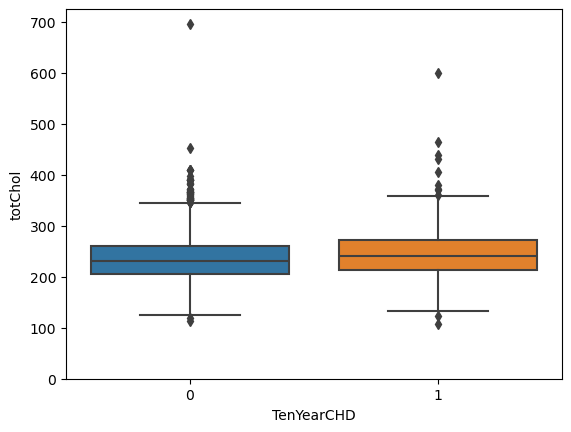

In [67]:
sns.boxplot(x='TenYearCHD',y='totChol',data=df)
plt.ylim(0,)

Patients with a ten year CHD risk have slightly higher cholesterol levels than patients who don't, though the difference is very small and not significant. This may be attributed to the fact that the variable 'total cholesterol' includes both LDL and HDL. LDL, or 'bad cholesterol' is said to increase the risk of CHD. HDL, or 'good cholesterol' is said to decrease the risk of CHD. The variable total cholesterol includes both of them, which is probably why its hard to see a proper relationship in the plot above. If the data set had the two kinds of cholesterol as separate variables, the outcome may have been clearer.

In [74]:
# lets take a look at both systolic and diastolic blood pressure, and visualize their relationship with ten year CHD risk.

(0.0, 152.88853940217393)

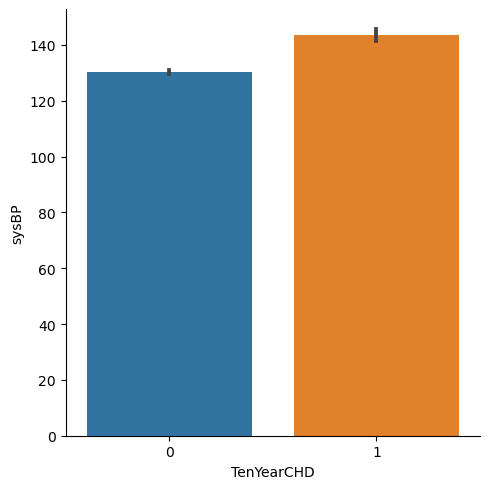

In [76]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=df)
plt.ylim(0,)

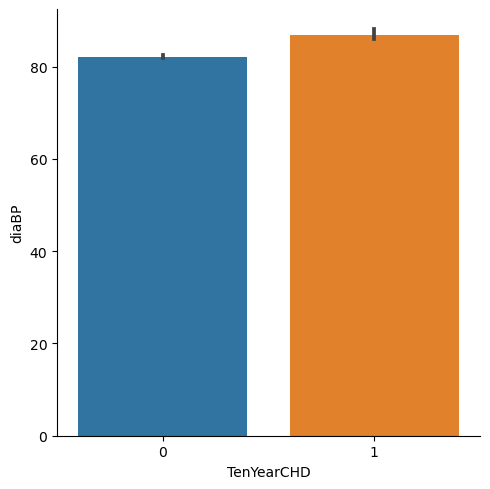

In [78]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=df)

Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don't.

In [81]:
# The relationship between BMI and the ten year risk of CHD.

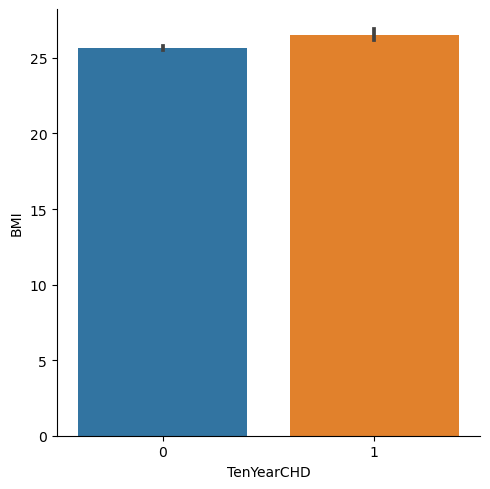

In [85]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=df)

Patients with CHD are seen to have slightly higher BMI than patients without.

In [88]:
# lets take a look at BP medications, and see if there is a relationship.

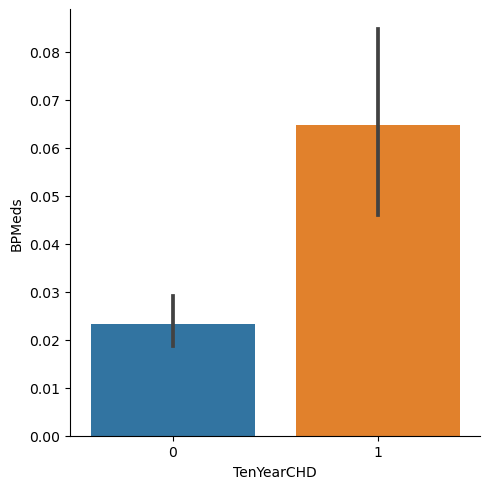

In [90]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=df)

A person who takes BP Medications is prone to have ten year CHD risks much more than those who don't

### DATA PREPROCESSING

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [96]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [134]:
# replacing the null values with its mean value

In [136]:
columns_with_nulls = df.columns[df.isnull().any()]

for column in columns_with_nulls:
    mean_value = np.round(df[column].mean(), 1)
    df[column].replace(np.nan, mean_value, inplace=True)

In [138]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [148]:
# check for duplicated values

In [146]:
duplicated = df[df.duplicated()]
duplicated

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [150]:
df.shape

(4240, 16)

#### Calculating Baseline Accuracy

In [154]:
class_counts = df['TenYearCHD'].value_counts()
class_counts

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [156]:
most_frequent_class_count = class_counts.max()
most_frequent_class_count

3596

In [160]:
base_line_accuracy = most_frequent_class_count/len(df['TenYearCHD'])
base_line_accuracy

0.8481132075471698

##### The model needs to beat the baseline accuracy of 0.85.

### Train-test split

In [176]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2968, 15) (1272, 15)
(2968,) (1272,)


In [181]:
y_train.value_counts()

TenYearCHD
0    2519
1     449
Name: count, dtype: int64

### Over and under-sampling
The data set it unbalanced, and more than 80% of the data is of participants who don't have a ten year CHD risk. To overcome this, I did both; oversampling and undersampling. Then, I created a pipeline for a decision tree classifier.

In [183]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.3)

In [185]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5034, 15) (2158, 15)
(5034,) (2158,)


In [187]:
y_train.value_counts()

TenYearCHD
1    2521
0    2513
Name: count, dtype: int64

### Fitting the data to the pipeline

In [193]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [195]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

### Making the Prediction

In [214]:
pipepred = pipeline.predict(X_test)
pipepred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

### Model Evaluation

In [216]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [218]:
accuracy = accuracy_score(y_test,pipepred)
conf_matrix = confusion_matrix(y_test,pipepred)
precision = precision_score(y_test,pipepred)
recall = recall_score(y_test,pipepred)
f1_score = f1_score(y_test,pipepred)
print("Model Results:")
print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Model Results:
Accuracy score: 0.8975903614457831
Precision score: 0.8315217391304348
Recall: 0.9962790697674418
F1 Score: 0.9064748201438849


In [220]:
print('confusion Matrix :',conf_matrix)

confusion Matrix : [[ 866  217]
 [   4 1071]]


In [232]:
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1083
           1       0.83      1.00      0.91      1075

    accuracy                           0.90      2158
   macro avg       0.91      0.90      0.90      2158
weighted avg       0.91      0.90      0.90      2158



#### Conclusion

##### The model usin DECISION TREE Chas high precision and recall for both outcomes, and has an accuracy of 0.90, which beats the baseline.